# Tōkyō Daily Summer Temperatures

An analysis of the maximum daily temperature in summer in Tōkyō since 1876. Data sourced from [data.world](https://data.world/marshallqiu/tokyodailyaveragetemperaturefrom1876to2018).

In [1]:
 %matplotlib inline

In [63]:
from datetime import datetime, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Import data

Data in TSV format.

In [36]:
temps = pd.read_csv("tokyo_hot.tsv", sep = '\t')

In [37]:
temps.head(5)

,Year,Date,Max_Temp,ROW
0,1876,6/1/1876,17.0,1
1,1876,6/2/1876,19.1,1
2,1876,6/3/1876,17.9,1
3,1876,6/4/1876,18.8,1
4,1876,6/5/1876,19.1,1


## Transform data

Convert Date to date format and index off it. Create day and month columns.
The data only contains summer temperatures between the dates 1st June and 30th September each year.

In [38]:
temps.Date = pd.to_datetime(temps.Date)
temps.index = temps.Date

In [300]:
temps['Day'] = pd.Series(data = temps.Date.apply(lambda d: d.day), index = temps.Date)
temps['Month'] = pd.Series(data = temps.Date.apply(lambda d: d.month), index = temps.Date)
temps['DayOfWeek'] = pd.Series(data = temps.Date.apply(lambda d: d.weekday()), index = temps.Date)

# Create a column with the number of days since 1st June each year
def day_number(d):
  jun_01 = date(d.year, 6, 1)
  return d.toordinal() - jun_01.toordinal()

temps['DayOfYear'] = pd.Series(data = temps.Date.apply(day_number), index = temps.Date)

In [301]:
temps.dtypes

Year                     int64
Date            datetime64[ns]
Max_Temp               float64
ROW                      int64
Day                      int64
Month                    int64
DayOfWeek                int64
Max_Temp_Bin          category
DayOfYear                int64
dtype: object

In [105]:
temps.Date.min(), temps.Date.max()

(Timestamp('1876-06-01 00:00:00'), Timestamp('2018-07-17 00:00:00'))

In [106]:
temps.head()

,Year,Date,Max_Temp,ROW,Day,Month,DayOfWeek,Max_Temp_Bin,DayOfYear
Date,,,,,,,,,
1876-06-01,1876,1876-06-01,17.0,1,1,6,3,"(15, 20]",0
1876-06-02,1876,1876-06-02,19.1,1,2,6,4,"(15, 20]",1
1876-06-03,1876,1876-06-03,17.9,1,3,6,5,"(15, 20]",2
1876-06-04,1876,1876-06-04,18.8,1,4,6,6,"(15, 20]",3
1876-06-05,1876,1876-06-05,19.1,1,5,6,0,"(15, 20]",4


## Explore data

In [107]:
temps.describe()

,Year,Max_Temp,ROW,Day,Month,DayOfWeek,DayOfYear
count,17371.000000,17365.000000,17371.000000,17371.000000,17371.000000,17371.000000,17371.000000
mean,1946.693455,23.905045,71.693455,15.747050,7.496920,3.000748,60.398538
std,41.104691,3.410202,41.104691,8.806513,1.111063,2.000043,35.231494
min,1876.000000,11.100000,1.000000,1.000000,6.000000,0.000000,0.000000
25%,1911.000000,21.400000,36.000000,8.000000,7.000000,1.000000,30.000000
50%,1947.000000,24.200000,72.000000,16.000000,7.000000,3.000000,60.000000
75%,1982.000000,26.600000,107.000000,23.000000,8.000000,5.000000,91.000000
max,2018.000000,33.200000,143.000000,31.000000,9.000000,6.000000,121.000000


### Heat map

Bin the max temp values.

In [44]:
bins = [10, 15, 20, 25, 30, 35]
temps['Max_Temp_Bin'] = pd.cut(temps.Max_Temp, bins)

In [45]:
temps.head(5)

,Year,Date,Max_Temp,ROW,Day,Month,DayOfWeek,Max_Temp_Bin
Date,,,,,,,,
1876-06-01,1876,1876-06-01,17.0,1,1,6,3,"(15, 20]"
1876-06-02,1876,1876-06-02,19.1,1,2,6,4,"(15, 20]"
1876-06-03,1876,1876-06-03,17.9,1,3,6,5,"(15, 20]"
1876-06-04,1876,1876-06-04,18.8,1,4,6,6,"(15, 20]"
1876-06-05,1876,1876-06-05,19.1,1,5,6,0,"(15, 20]"


Turn data into wide format.

In [108]:
temps_wide = temps.pivot_table(index = 'Year', columns = 'DayOfYear', values = 'Max_Temp')

In [109]:
temps_wide.head(5)

DayOfYear,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
Year,,,,,,,,,,,,,,,,,,,,,
1876,17.0,19.1,17.9,18.8,19.1,20.8,16.7,18.7,16.8,18.2,...,17.2,18.3,17.6,17.7,20.6,22.4,23.0,NaN,19.6,14.7
1877,18.0,18.9,21.8,21.4,20.4,20.9,20.2,20.2,22.0,20.6,...,19.1,20.2,21.2,22.1,19.6,17.9,20.4,17.9,18.4,18.5
1878,11.1,11.8,14.9,17.9,20.7,18.4,19.1,18.2,18.3,19.3,...,26.9,26.3,26.9,24.4,20.9,21.7,17.7,17.3,17.2,19.7
1879,18.3,15.8,16.4,17.6,21.6,20.5,22.9,23.4,19.2,20.0,...,23.7,22.4,19.4,18.9,21.5,20.3,18.4,19.8,21.6,23.2
1880,15.9,15.1,17.3,19.3,19.7,21.1,22.4,22.5,20.2,20.2,...,23.4,24.2,26.8,20.1,20.5,20.6,19.4,18.9,18.9,17.7


Plot the data as a heatmap from 1st June to 30th September along the x-axis.

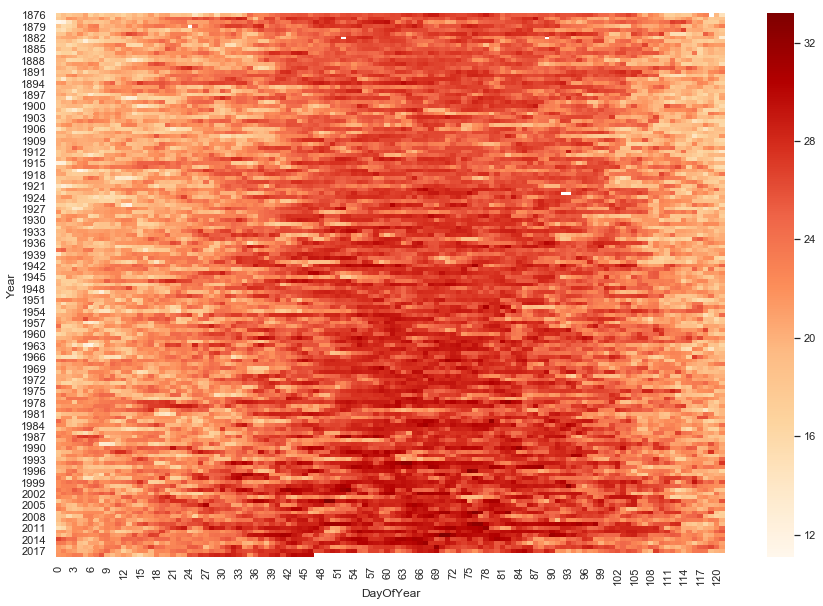

In [110]:
plt.figure(figsize=(15, 10))
sns.heatmap(temps_wide, cmap = 'OrRd')

### Increase in mean summer temps

Look at the yearly mean temperature over time.

In [86]:
temps_year = temps.groupby('Year')

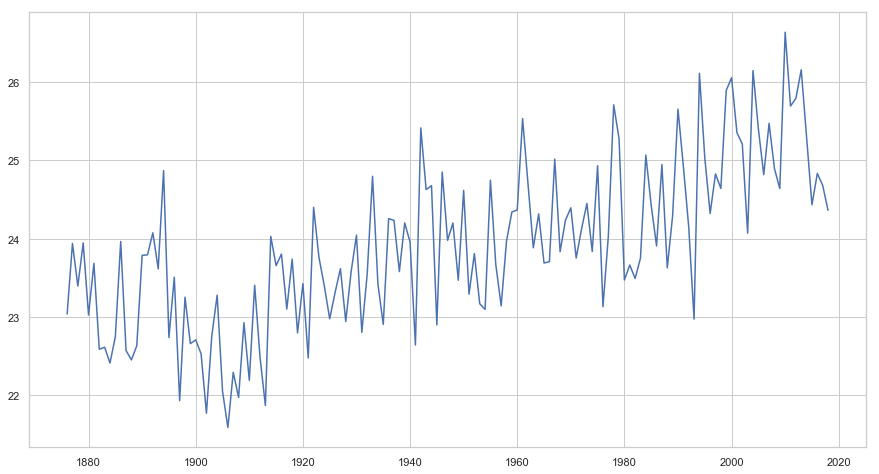

In [91]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = temps_year.Max_Temp.mean());

This shows a steady increase in mean temperature over the last century. Let's look at a smoothed version of the mean.

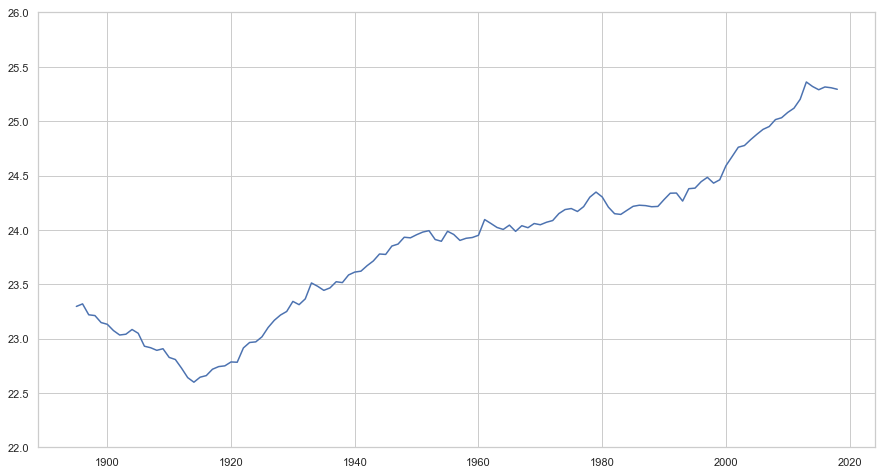

In [102]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = temps_year.Max_Temp.mean().rolling(20).mean())
plt.ylim([22, 26]);

Try a regression model to quantify the increase over 100 years up to 2017, and remove any NA values.

In [236]:
t_100y = temps[temps.Date >= pd.to_datetime('1917-06-01')] \
  .dropna() \
  .groupby('Year')

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [299]:
lr = LinearRegression() 

lr_x = np.transpose(np.atleast_2d(np.arange(1917, 2019)))
lr_y = np.array(t_100y.Max_Temp.agg('mean'))

len(lr_x), len(lr_y)

(102, 102)

In [265]:
lr.fit(lr_x, lr_y);

lr_y_pred = lr.predict(lr_x)
r2_score(lr_y, lr_y_pred)

0.39524288883894065

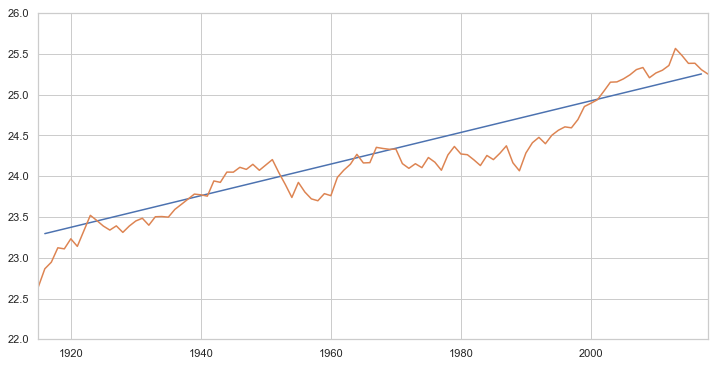

In [269]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = np.arange(1916, 2018), y = lr_y_pred)
sns.lineplot(data = temps_year.Max_Temp.mean().rolling(10).mean())
plt.xlim(1915, 2018)
plt.ylim(22, 26);

/Users/andrew/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


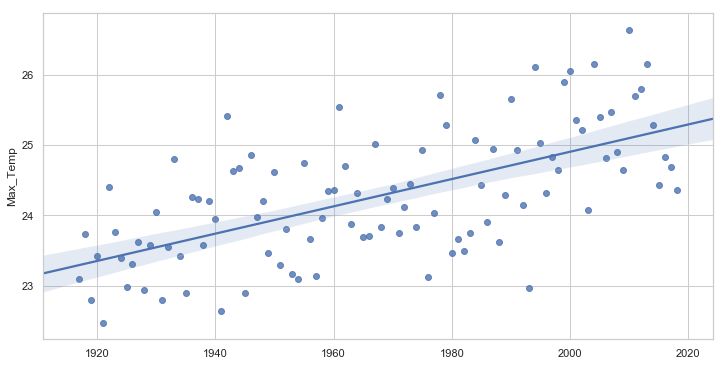

In [325]:
plt.figure(figsize = (12, 6))
sns.regplot(x = np.arange(1917, 2019), 
            y = t_100y.Max_Temp.agg('mean'));

## Recent variations

Look at just the last ten years.

In [271]:
temps_10y = temps[temps.Date >= pd.to_datetime('2008-06-01')]

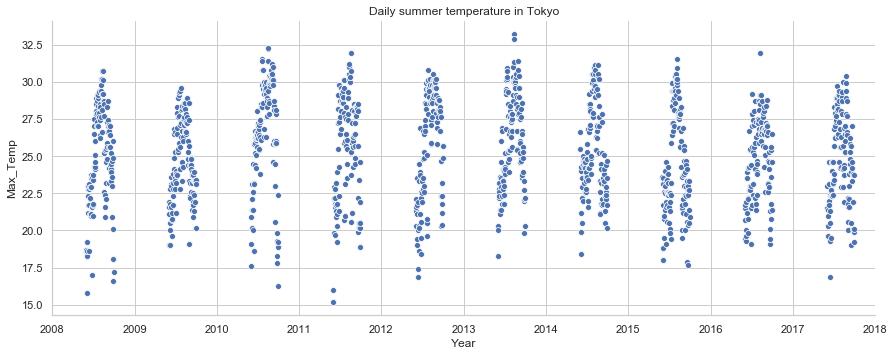

In [302]:
sns.relplot(x = "Date", y = "Max_Temp", data = temps_10y, aspect = 2.5)
plt.xlim(pd.to_datetime("2008"), pd.to_datetime("2018"))
plt.title("Daily summer temperature in Tokyo")
plt.xlabel("Year");

In [276]:
t_10y_grp = temps_10y.groupby('Year')['Max_Temp']
t_10y_grp.mean()

Year
2008    24.897541
2009    24.641803
2010    26.638525
2011    25.695082
2012    25.793443
2013    26.158197
2014    25.288525
2015    24.433607
2016    24.834426
2017    24.682787
2018    24.363830
Name: Max_Temp, dtype: float64

Look at boxplots for each year.

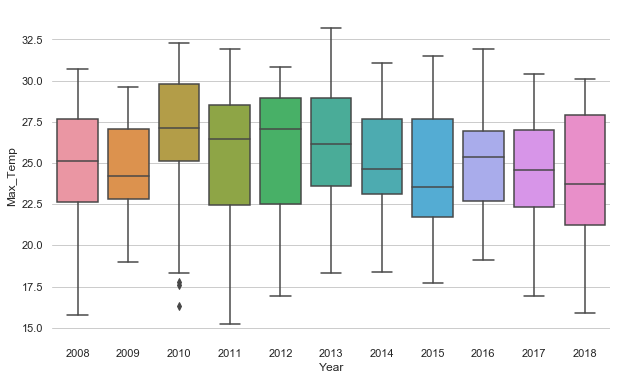

In [303]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Year", y = "Max_Temp", data = temps_10y)
sns.despine(left = True, bottom = True)

And by month...

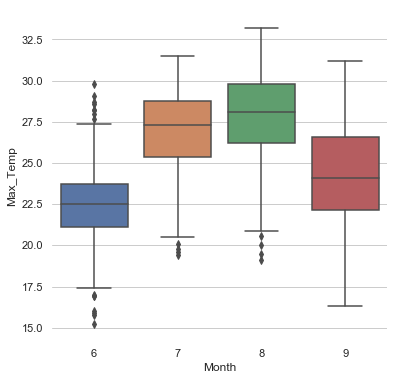

In [282]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = "Month", y = "Max_Temp", data = temps_10y)
sns.despine(left = True, bottom = True)

June is an interesting month. The interquartile range of temperatures over the last 10 years is quite tight, but there are a lot of outliers in both directions.

/Users/andrew/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


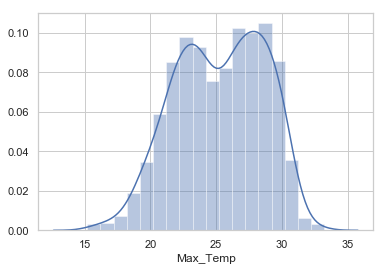

In [298]:
sns.distplot(temps_10y.Max_Temp);